# **Lab Exercise 1:** Introduction to LDA for Dimensionality Reduction

## 1. Load the Dataset:

**Use the Iris dataset (available in sklearn or seaborn). The dataset has 4 features and 3 classes.**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [5]:
data = load_iris()
X = data.data  # Feature matrix (4 features)
y = data.target  # Target labels (3 classes)
target_names = data.target_names

## 2. Data Standardization:

**Standardize the data so that it has a mean of 0 and a standard deviation of 1.**

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [9]:
print("Standardized data:")
print(X_standardized[:5])

Standardized data:
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


## 3. Apply LDA:

**Implement LDA using sklearns LinearDiscriminantAnalysis class. Reduce the dimensionality of the dataset to 2
components.**

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_standardized, y)

In [13]:
print(f"Transformed shape with LDA: {X_lda.shape}")

Transformed shape with LDA: (150, 2)


## 4. Visualization:

**Create a 2D scatter plot of the transformed data, using different colors for each class.**

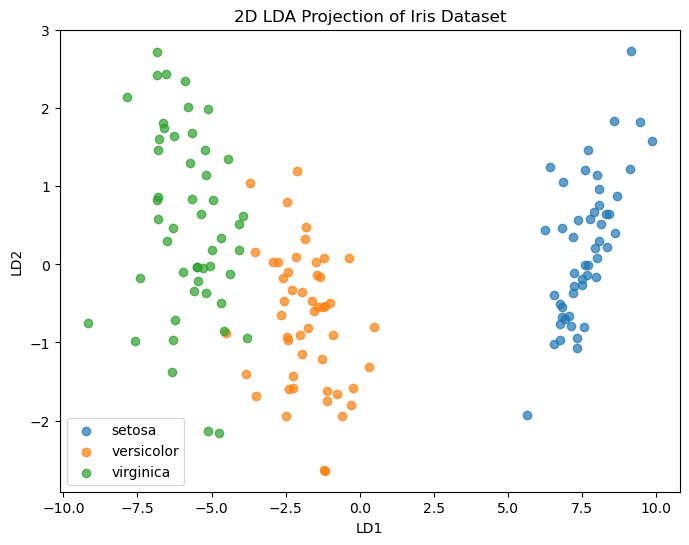

In [16]:
plt.figure(figsize=(8, 6))
for i, target in enumerate(np.unique(y)):
    plt.scatter(X_lda[y == target, 0], X_lda[y == target, 1], 
                label=target_names[target], alpha=0.7)

plt.title("2D LDA Projection of Iris Dataset")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.show()

## 5. Compare LDA with PCA:

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

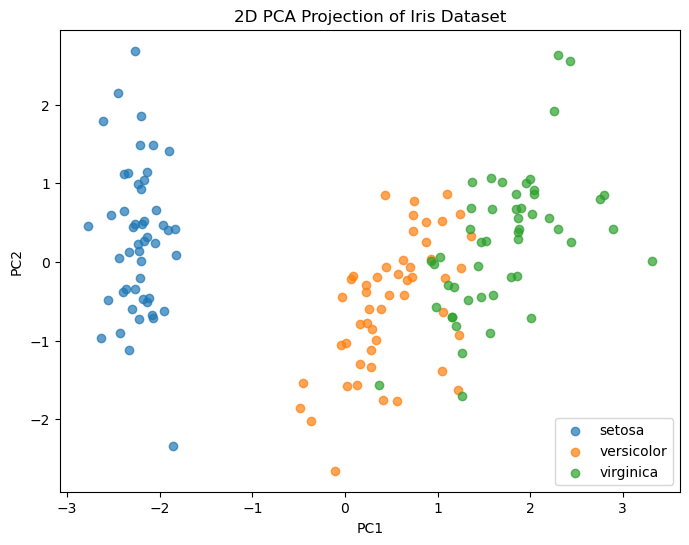

In [30]:
plt.figure(figsize=(8, 6))
for i, target in enumerate(np.unique(y)):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], 
                label=target_names[target], alpha=0.7)

plt.title("2D PCA Projection of Iris Dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

# **Lab Exercise 2:** LDA for Classification

## 1. Load the Dataset:

**Use the Wine dataset from sklearn, which contains 13 features and 3 classes.**

In [37]:
from sklearn.datasets import load_wine

In [39]:
data = load_wine()
X = data.data 
y = data.target

In [41]:
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Classes: {data.target_names}")

Feature matrix shape: (178, 13)
Target vector shape: (178,)
Classes: ['class_0' 'class_1' 'class_2']


## 2. Split the Data:

**Split the data into training and testing sets (e.g., 70% training, 30% testing).**

In [45]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [49]:
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (124, 13)
Testing set shape: (54, 13)


## 3. Train an LDA Model:

**Use LDA as a classifier by training a LinearDiscriminantAnalysis model on the training data.**

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
lda = LDA()
lda.fit(X_train_scaled, y_train)

LinearDiscriminantAnalysis()

In [62]:
y_pred_lda = lda.predict(X_test_scaled)

## 4. Evaluate the Model:

**Predict the labels on the test set and compute the model&#39;s accuracy, precision, recall, and confusion matrix.**

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [70]:
accuracy = accuracy_score(y_test, y_pred_lda)
precision = precision_score(y_test, y_pred_lda, average='weighted')
recall = recall_score(y_test, y_pred_lda, average='weighted')

In [72]:
print(f"LDA Accuracy: {accuracy:.2f}")
print(f"LDA Precision: {precision:.2f}")
print(f"LDA Recall: {recall:.2f}")

LDA Accuracy: 0.98
LDA Precision: 0.98
LDA Recall: 0.98


In [74]:
conf_matrix = confusion_matrix(y_test, y_pred_lda)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]


In [76]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_lda))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



## 5. Compare with Logistic Regression:

**Train a logistic regression model on the same dataset, and compare its performance with the LDA classifier.**

In [80]:
from sklearn.linear_model import LogisticRegression

In [82]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [84]:
y_pred_log_reg = log_reg.predict(X_test_scaled)

In [86]:
accuracy_log = accuracy_score(y_test, y_pred_log_reg)
precision_log = precision_score(y_test, y_pred_log_reg, average='weighted')
recall_log = recall_score(y_test, y_pred_log_reg, average='weighted')

In [88]:
print(f"\nLogistic Regression Accuracy: {accuracy_log:.2f}")
print(f"Logistic Regression Precision: {precision_log:.2f}")
print(f"Logistic Regression Recall: {recall_log:.2f}")


Logistic Regression Accuracy: 0.98
Logistic Regression Precision: 0.98
Logistic Regression Recall: 0.98


In [90]:
conf_matrix_log = confusion_matrix(y_test, y_pred_log_reg)
print("\nLogistic Regression Confusion Matrix:\n", conf_matrix_log)


Logistic Regression Confusion Matrix:
 [[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]
